In [1]:
# team02

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8', index_col='_id')
df_test =  pd.read_csv('test.csv', sep=',', encoding='utf8', index_col='_id')
df_sample =  pd.read_csv('sample_submission.csv', sep=',', encoding='utf8', index_col='_id')
#обрабатывать параметры надо на трейн и тест сразу


#план выбора модели:
# 1) преобразовать все параметры в числовой формат
# 2) построить 3 модели на этих данных и посмотреть roc-auc и другие метрики качества
# 3) посмотреть коэфициенты по логистической регрессии
# 4) выкинуть те фичи, где около нуля коэфициенты # подход не сработал. В итоге выкидывал последовательно все фичи, искал те, после исключения которых падает сильно качество модели. В итоге оставил 5.
# 5) заново построить 3 модели на этих данных и посмотреть roc-auc и другие метрики качества
# 6) попробовать построить свои предположения по тому, как обработать параметры
# 7) заново построить 3 модели на этих данных и посмотреть roc-auc и другие метрики качества

In [3]:
df_test.shape

(16476, 20)

In [4]:
df_sample.head()

,target
_id,
66810d8e6bf2b41c880a7bc6c8a1e295,0.066375
ccac3879652b08cb8b44c1920fd93afa,0.010286
fcccab4d7a76f70647f015f2c84c2af8,0.015206
ed8399278c30678dab739045fa12b440,0.035821
1d4d62ac5cabcb48bac7112813f290cb,0.019478


In [5]:
train_target = pd.DataFrame(df_train['target'])
df_train = df_train.drop(['target'], axis=1)

In [6]:
print(df_train.shape)
print(df_test.shape)
print(train_target.shape)
print(df_sample.shape)

(24712, 20)
(16476, 20)
(24712, 1)
(16476, 1)


In [7]:
type(df_sample['target'])

pandas.core.series.Series

In [8]:
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,sample
_id,,,,,,,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,test
ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,test
fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,test
ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,test
1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,test


In [11]:
df = df_test.append(df_train)

In [12]:
df.shape

(41188, 21)

# тестируем скинуть данные
df_for_model = df.drop([
'month',
'day_of_week',
'education',
'job',
'poutcome',
'marital',
'default',
'contact',
'housing',
'loan',
'euribor3m',
'campaign',
'previous',
'cons.price.idx',
'emp.var.rate'], axis=1)

In [13]:
#df_for_model = pd.get_dummies(df, columns=[
#'job',
#'marital',
#'education',
#'default',
#'housing',
#'loan',
#'contact',
#'month',
#'day_of_week',
#'poutcome'])

#!!!!!!!!!самые важны фичи!!!!!!!!!!!!!!!
#euribor3m
#duration
#emp.var.rate
#cons.price.idx

In [14]:
df_for_model = df.drop(['month', 'day_of_week', 'education', 'job', 'poutcome', 'marital', 'default', 'contact', 'housing', 'loan', 'campaign', 'previous','age','nr.employed'], axis=1)

In [25]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41188 entries, 66810d8e6bf2b41c880a7bc6c8a1e295 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 7 columns):
duration          41188 non-null int64
pdays             41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
sample            41188 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 3.8+ MB


In [16]:
df_for_model

,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,sample
_id,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,371,999,-1.8,92.893,-46.2,1.299,test
ccac3879652b08cb8b44c1920fd93afa,285,999,1.1,93.994,-36.4,4.860,test
fcccab4d7a76f70647f015f2c84c2af8,52,999,-1.8,92.893,-46.2,1.313,test
ed8399278c30678dab739045fa12b440,355,999,1.4,94.465,-41.8,4.967,test
1d4d62ac5cabcb48bac7112813f290cb,189,999,1.4,93.918,-42.7,4.963,test
aba2dec4c5cab88824f36babd24b986f,605,999,1.4,93.918,-42.7,4.962,test
06f318f1dd178e738f675bb88a5adb84,243,999,1.1,93.994,-36.4,4.856,test
d5036f5956e42ee6207296238fc4bc1d,24,999,1.4,93.444,-36.1,4.962,test
fe0cc8933698ad4046ff2b82f65756eb,126,999,1.4,94.465,-41.8,4.962,test


# тестируем скинуть данные
df_for_model = df_for_model.drop(['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri'], axis=1)

In [18]:
df_model_train = df_for_model.query('sample == "train"').drop(['sample'], axis=1)
df_model_test = df_for_model.query('sample == "test"').drop(['sample'], axis=1)

In [19]:
df_model_train.shape

(24712, 6)

In [20]:
df_model_test.shape

(16476, 6)

In [30]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

XX_train, XX_test, yy_train, yy_test = train_test_split(df_model_train, train_target, test_size=0.33, random_state=42)

In [22]:
print(XX_train.shape)
print(XX_test.shape)
print(yy_train.shape)
print(yy_test.shape)

(16557, 6)
(8155, 6)
(16557, 1)
(8155, 1)


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dtc.fit(XX_train, yy_train)
predict = dtc.predict(XX_test)
predict_pr = dtc.predict_proba(XX_test)


dtc3 = RandomForestClassifier(max_depth=9, criterion='entropy')
dtc3.fit(XX_train, yy_train)
predict3 = dtc3.predict(XX_test)
predict_pr3 = dtc3.predict_proba(XX_test)


dtc4 = LogisticRegression()
dtc4.fit(XX_train, yy_train)
predict4 = dtc4.predict(XX_test)
predict_pr4 = dtc4.predict_proba(XX_test)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(XX_train, yy_train)
predictKnn = knn.predict(XX_test)
predict_Knn = knn.predict_proba(XX_test)

C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Посчитать метрики стандартные
# accuracy, precision, recall

print('precision', precision_score(yy_test, predict))
print('recall', recall_score(yy_test, predict))
print('accuracy', accuracy_score(yy_test, predict))

print('-'*10)

print('precision', precision_score(yy_test, predict3))
print('recall', recall_score(yy_test, predict3))
print('accuracy', accuracy_score(yy_test, predict3))

print('-'*10)

print('precision', precision_score(yy_test, predict4))
print('recall', recall_score(yy_test, predict4))
print('accuracy', accuracy_score(yy_test, predict4))

print('-'*10)

print('precision', precision_score(yy_test, predictKnn))
print('recall', recall_score(yy_test, predictKnn))
print('accuracy', accuracy_score(yy_test, predictKnn))

precision 0.6513911620294599
recall 0.43027027027027026
accuracy 0.9092581238503985
----------
precision 0.6404199475065617
recall 0.5275675675675676
accuracy 0.9128142244022073
----------
precision 0.6457925636007827
recall 0.3567567567567568
accuracy 0.9048436541998773
----------
precision 0.489432703003337
recall 0.4756756756756757
accuracy 0.8842427958307787


In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(yy_test, predict)
precision3, recall3, thresholds3 = precision_recall_curve(yy_test, predict3)
precision4, recall4, thresholds4 = precision_recall_curve(yy_test, predict4)

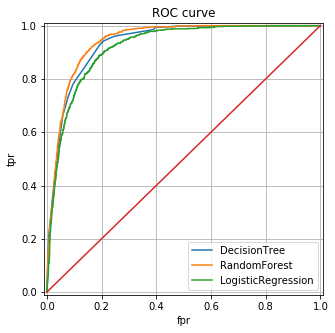

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(yy_test, predict_pr[:,1])
fpr3, tpr3, thresholds3 = roc_curve(yy_test, predict_pr3[:,1])
fpr4, tpr4, thresholds4 = roc_curve(yy_test, predict_pr4[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='DecisionTree')
plt.plot(fpr3, tpr3, label='RandomForest')
plt.plot(fpr4, tpr4, label='LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc='best');

In [36]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [37]:
cross_val_score(
    dtc,
    df_model_train,
    train_target['target'],
    scoring='roc_auc',
    cv = 10
).mean()
#0.9355952141150086 - max результат что ловил, когда убрал 'month','day_of_week'
#0.9363370010633106 - max результат что ловил, когда оставил age, duration, pdays, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, sample

0.9311053440573847

In [31]:
#ищу лучшую глубину
for i in range(4, 15):
    
    dtc3 = RandomForestClassifier(max_depth=i, criterion='entropy')
    dtc3.fit(XX_train, yy_train)
    predict3 = dtc3.predict(XX_test)
    predict_pr3 = dtc3.predict_proba(XX_test)
    
    print(i)
    print(cross_val_score(
    dtc3,
    df_model_train,
    train_target['target'],
    scoring='roc_auc',
    cv = 10
        ).mean())

C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


4
0.9317050375182847
5


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9378642237918642
6


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9410830710771944
7


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9434782592218056
8


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9438904453122838


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


9
0.944074941036394


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


10
0.9427751138223636


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


11
0.941654222331689


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


12
0.937245546288732


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


13
0.93609965705915


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


14
0.9299512204708744


In [38]:
cross_val_score(
    dtc3,
    df_model_train,
    train_target['target'],
    scoring='roc_auc',
    cv=10
).mean()
#0.9373710176762355 - max результат что ловил, когда убрал cons.conf.idx,euribor3m, duration, emp.var.rate, cons.price.idx, pdays
#0.9376633227069199 - max результат что ловил, когда оставил только euribor3m, duration, emp.var.rate, cons.price.idx
#0.9387787401163525 - max результат что ловил, когда оставил только euribor3m, duration, emp.var.rate, cons.price.idx, pdays (выгрузил в subm 5)

0.9443960247596349

In [39]:
cross_val_score(
    dtc4,
    df_model_train,
    train_target['target'],
    scoring='roc_auc',
    cv=10
).mean()

0.9158544463593815

In [40]:
cross_val_score(
    knn,
    df_model_train,
    train_target['target'],
    scoring='roc_auc',
    cv=10
).mean()

0.7067581034326782

In [41]:
dtc5 = RandomForestClassifier(max_depth=9, criterion='entropy')
dtc5.fit(df_model_train, train_target['target'])
predict_pr5 = dtc5.predict_proba(df_model_test)



In [42]:
predict_pr5[:,1]

array([5.91622115e-02, 1.25651769e-03, 0.00000000e+00, ...,
       1.26499249e-03, 6.00353027e-04, 3.24044070e-05])

In [43]:
df_model_test['target'] = predict_pr5[:,1] 

In [44]:
pd.DataFrame(df_model_test['target']).to_csv('sample_submission6.csv')

### ниже тестировал исключение преобразованных фичей и следил за динамикой качества модели.

там где roc_auc по дереву решений или случайному лесу падал на 0,4 и более смотрел, что за признак выкинули.
таким образом нашел самые важные признаки и строил модель только на них

In [345]:
col = pd.DataFrame(dtc4.coef_).T

In [346]:
col1 = pd.DataFrame(XX_train.columns)

In [347]:
cols = pd.merge(col1, col, left_index=True, right_index=True)

In [348]:
import math
cols['0_y'] = cols['0_y'].map(lambda x: math.fabs(x))

In [349]:
cols = cols.sort_values('0_y', ascending=True)

In [350]:
cols

,0_x,0_y
24,default_yes,0.000019
18,education_illiterate,0.000338
3,pdays,0.001651
29,loan_unknown,0.002141
26,housing_unknown,0.002141
13,marital_unknown,0.002220
0,age,0.004278
1,duration,0.004313
9,nr.employed,0.006323
10,marital_divorced,0.008664


In [351]:
spisok = list(cols['0_x'])

In [369]:
spisok[33]
#euribor3m
#duration

'cons.price.idx'

In [368]:
for i in range(1, len(spisok)):
    print(spisok[:i])

['default_yes']
['default_yes', 'education_illiterate']
['default_yes', 'education_illiterate', 'pdays']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown', 'housing_unknown']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown', 'housing_unknown', 'marital_unknown']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown', 'housing_unknown', 'marital_unknown', 'age']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown', 'housing_unknown', 'marital_unknown', 'age', 'nr.employed']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown', 'housing_unknown', 'marital_unknown', 'age', 'nr.employed', 'marital_divorced']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown', 'housing_unknown', 'marital_unknown', 'age', 'nr.employed', 'marital_divorced', 'education_unknown']
['default_yes', 'education_illiterate', 'pdays', 'loan_unknown', 'housing_unknown', 'marital_unkn

In [370]:
list_predicts = []
for i in range(1, len(spisok)):

    
    df_del = df_for_model
    # тестируем скинуть данные
    df_del = df_del.drop(spisok[:i], axis=1)
    
    df_del_train = df_del.query('sample == "train"').drop(['sample'], axis=1)
    df_del_test = df_del.query('sample == "test"').drop(['sample'], axis=1)
    
    
    XX_del_train, XX_del_test, yy_del_train, yy_del_test = train_test_split(df_del_train, train_target, test_size=0.33, random_state=42)
    
    print(XX_del_train.shape)
    print(XX_del_test.shape)
    print(yy_del_train.shape)
    print(yy_del_test.shape)
    print(i)
    
    dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy')
    dtc.fit(XX_del_train, yy_del_train)
    predict = dtc.predict(XX_del_test)
    predict_pr = dtc.predict_proba(XX_del_test)


    dtc3 = RandomForestClassifier(max_depth=5, criterion='entropy')
    dtc3.fit(XX_del_train, yy_del_train)
    predict3 = dtc3.predict(XX_del_test)
    predict_pr3 = dtc3.predict_proba(XX_del_test)


    dtc4 = LogisticRegression()
    dtc4.fit(XX_del_train, yy_del_train)
    predict4 = dtc4.predict(XX_del_test)
    predict_pr4 = dtc4.predict_proba(XX_del_test)


    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(XX_del_train, yy_del_train)
    predictKnn = knn.predict(XX_del_test)
    predict_Knn = knn.predict_proba(XX_del_test)
  


    m1 = cross_val_score(
        dtc,
        df_del_train,
        train_target['target'],
        scoring='roc_auc',
        cv = 10
        ).mean()
    list_predicts.append(m1)
    print(m1)

    m2 = cross_val_score(
        dtc3,
        df_del_train,
        train_target['target'],
        scoring='roc_auc',
        cv=10
        ).mean()
    list_predicts.append(m2)
    print(m2)

    m3 = cross_val_score(
        dtc4,
        df_del_train,
        train_target['target'],
        scoring='roc_auc',
        cv=10
        ).mean()
    list_predicts.append(m3)
    print(m3)

    m4 = cross_val_score(
        knn,
        df_del_train,
        train_target['target'],
        scoring='roc_auc',
        cv=10
        ).mean()
    list_predicts.append(m4)
    print(m4)

(16557, 35)
(8155, 35)
(16557, 1)
(8155, 1)
1


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9322393153852643
0.9229032033732081
0.921825672891298
0.7103475080284285
(16557, 34)
(8155, 34)
(16557, 1)
(8155, 1)
2


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9322393153852643
0.9248360537525301
0.9220026630877237
0.7103475080284285
(16557, 33)
(8155, 33)
(16557, 1)
(8155, 1)
3


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9321324997481015
0.9234046996558384
0.916810257868088
0.700371156514844
(16557, 32)
(8155, 32)
(16557, 1)
(8155, 1)
4


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.932124458735656
0.9225585675346488
0.9173089121091241
0.7004623661866266
(16557, 31)
(8155, 31)
(16557, 1)
(8155, 1)
5


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9321324997481015
0.9273731184896498
0.916889990557998
0.700214089815961
(16557, 30)
(8155, 30)
(16557, 1)
(8155, 1)
6


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.932124458735656
0.9270038753489542
0.9171175963236328
0.700214089815961
(16557, 29)
(8155, 29)
(16557, 1)
(8155, 1)
7


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9320572260136458
0.9245691471312704
0.917335516190605
0.702500677696638
(16557, 28)
(8155, 28)
(16557, 1)
(8155, 1)
8


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9313449198675865
0.9295825563267348
0.9176839146939739
0.6969920992309081
(16557, 27)
(8155, 27)
(16557, 1)
(8155, 1)
9


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9313434489116122
0.9266317085404927
0.9176667639294432
0.6967672569220412
(16557, 26)
(8155, 26)
(16557, 1)
(8155, 1)
10


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9313434489116122
0.9293471105530253
0.9175048775274917
0.696588658893951
(16557, 25)
(8155, 25)
(16557, 1)
(8155, 1)
11


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9313664121687666
0.9313285972612759
0.917776531206863
0.6976899562055411
(16557, 24)
(8155, 24)
(16557, 1)
(8155, 1)
12


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308130572247508
0.9253454108675789
0.9177964197016448
0.697118609066097
(16557, 23)
(8155, 23)
(16557, 1)
(8155, 1)
13


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308377365972085
0.9257895646236204
0.9175956848550044
0.7003995446661626
(16557, 22)
(8155, 22)
(16557, 1)
(8155, 1)
14


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308377365972085
0.9244083907262034
0.9175689638254235
0.7002772791043851
(16557, 21)
(8155, 21)
(16557, 1)
(8155, 1)
15


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308377365972085
0.9273886243444952
0.917602968796032
0.7022517348847391
(16557, 20)
(8155, 20)
(16557, 1)
(8155, 1)
16


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308377365972085
0.9284936265687271
0.9174344187743015
0.7032852773890985
(16557, 19)
(8155, 19)
(16557, 1)
(8155, 1)
17


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308377365972085
0.930097414322107
0.9176242392585733
0.7038515971329332
(16557, 18)
(8155, 18)
(16557, 1)
(8155, 1)
18


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308377365972085
0.9311436673551242
0.9175710786384398
0.7047458399114868
(16557, 17)
(8155, 17)
(16557, 1)
(8155, 1)
19


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9308377365972085
0.9324906483461335
0.9176887393784705
0.7045945235123383
(16557, 16)
(8155, 16)
(16557, 1)
(8155, 1)
20


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9287131442996799
0.9314553850971997
0.9167741792165822
0.676476873071808
(16557, 15)
(8155, 15)
(16557, 1)
(8155, 1)
21


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9287131442996799
0.9288967548347479
0.916725110771217
0.675921938554797
(16557, 14)
(8155, 14)
(16557, 1)
(8155, 1)
22


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9287131442996799
0.9277813469264518
0.9164438351833342
0.675610451596501
(16557, 13)
(8155, 13)
(16557, 1)
(8155, 1)
23


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9287095154924151
0.9325297289767936
0.9165116822970495
0.6809926812001537
(16557, 12)
(8155, 12)
(16557, 1)
(8155, 1)
24


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9287062467013613
0.9332696939711382
0.9165383966824461
0.6895692582173345
(16557, 11)
(8155, 11)
(16557, 1)
(8155, 1)
25


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9286901558583256
0.9322757219052947
0.9155819589330051
0.6939603727379382
(16557, 10)
(8155, 10)
(16557, 1)
(8155, 1)
26


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9275169336843592
0.9339740221977471
0.9059991711647373
0.6956686045959655
(16557, 9)
(8155, 9)
(16557, 1)
(8155, 1)
27


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9272240361521723
0.9345105411732959
0.904445198006038
0.6936269296877267
(16557, 8)
(8155, 8)
(16557, 1)
(8155, 1)
28


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9272240361521723
0.931786226081757
0.9044389067891225
0.6949668485437595
(16557, 7)
(8155, 7)
(16557, 1)
(8155, 1)
29


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9272858464578583
0.9338011372574011
0.9029681113529128
0.6941163388244089
(16557, 6)
(8155, 6)
(16557, 1)
(8155, 1)
30


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9273790089911229
0.9360022539603163
0.9017896890982499
0.6985643713073671
(16557, 5)
(8155, 5)
(16557, 1)
(8155, 1)
31


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9273790089911229
0.9369925801168766
0.9018256093077236
0.7016128794234142
(16557, 4)
(8155, 4)
(16557, 1)
(8155, 1)
32


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.926394407434065
0.9376105728672725
0.9018658187650767
0.6968234143697228
(16557, 3)
(8155, 3)
(16557, 1)
(8155, 1)
33


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9257979675186025
0.9334016114002672
0.900983954472266
0.6884910512256608


In [376]:
max(list_predicts)

0.9376105728672725

In [377]:
spisok[:32]

['default_yes',
 'education_illiterate',
 'pdays',
 'loan_unknown',
 'housing_unknown',
 'marital_unknown',
 'age',
 'nr.employed',
 'marital_divorced',
 'education_unknown',
 'education_professional.course',
 'poutcome_success',
 'campaign',
 'housing_yes',
 'loan_yes',
 'education_basic.6y',
 'housing_no',
 'education_basic.4y',
 'loan_no',
 'cons.conf.idx',
 'education_high.school',
 'education_basic.9y',
 'marital_single',
 'marital_married',
 'previous',
 'poutcome_nonexistent',
 'poutcome_failure',
 'default_unknown',
 'default_no',
 'education_university.degree',
 'contact_telephone',
 'contact_cellular']

In [378]:
spisok[32:]

['emp.var.rate', 'cons.price.idx']

In [ ]:
самые важные признаки
#euribor3m
#duration
#emp.var.rate
#cons.price.idx
#0.9376105728672725 - лучшее что видел на random forest при этом работали только фичи указанные выше